This notebook vectorizes the title text, and compares counts for subreddit using different NLP functions. If the title is determined to be insufficient in the final model, the title + selftext column will be used <br>

having issues with nltk. Original notebook code not working for getting the install window to open again, conda says its installed, but notebook isn't able to import. <br>

going to use count vectorizor to piece by piece clean out useless tokens, such as numbers or foreign characters. A min documents parameter should help filter typos as well.

later a gridsearch will be used to generate the actual tokens used, but obvious typos will be addressed here as well as visualization

In [63]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [64]:
df = pd.read_csv('./data/posts_cleaned_100k.csv')

In [65]:
X = df['title']
y = df['sub_bin']
cvec = CountVectorizer(stop_words='english')

In [66]:
cvec.fit(X)

CountVectorizer(stop_words='english')

In [67]:
X = cvec.transform(X)

In [68]:
X.head()

<72920x33683 sparse matrix of type '<class 'numpy.int64'>'
	with 681084 stored elements in Compressed Sparse Row format>

In [69]:
X_df = pd.DataFrame(X.todense(),
                          columns=cvec.get_feature_names())

/home/dale/anaconda3/envs/python397/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
X_df.head(10)

,00,000,00001,0002,000aud,000mph,000s,000th,001,002,...,𝙩𝙤,𝙫𝙤𝙩𝙚,𝙮𝙤𝙪,𝙱𝚊𝚋𝚢,𝙱𝚎𝚐𝚒𝚗,𝙶𝚊𝚖𝚎𝚜,𝙻𝚎𝚝,𝚒𝚗𝚏𝚘𝚐𝚛𝚊𝚙𝚑𝚒𝚌,𝚝𝚑𝚎,𝟣𝟤
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lots of numbers, foreign language characters. start by filtering those out

In [71]:
tokens = X_df.columns

In [72]:
len(tokens)

Index(['00', '000', '00001', '0002', '000aud', '000mph', '000s', '000th',
       '001', '002',
       ...
       '𝙩𝙤', '𝙫𝙤𝙩𝙚', '𝙮𝙤𝙪', '𝙱𝚊𝚋𝚢', '𝙱𝚎𝚐𝚒𝚗', '𝙶𝚊𝚖𝚎𝚜', '𝙻𝚎𝚝', '𝚒𝚗𝚏𝚘𝚐𝚛𝚊𝚙𝚑𝚒𝚌',
       '𝚝𝚑𝚎', '𝟣𝟤'],
      dtype='object', length=33683)

In [73]:
mask = tokens.str.isdigit()

In [74]:
tokens_filter = [each for tf, each in zip(mask, tokens) if tf]

In [75]:
stopwords = tokens_filter + list(CountVectorizer(stop_words = 'english').get_stop_words())

In [76]:
stopwords.head()

['00',
 '000',
 '00001',
 '0002',
 '001',
 '002',
 '007',
 '009',
 '01',
 '011',
 '014',
 '02',
 '03',
 '031',
 '04',
 '041',
 '05',
 '051',
 '06',
 '07',
 '074',
 '08',
 '081',
 '087',
 '09',
 '096',
 '10',
 '100',
 '1000',
 '10036',
 '100623846',
 '101',
 '10142112243',
 '102',
 '1031',
 '1032',
 '104',
 '105',
 '106',
 '107',
 '10712',
 '1074',
 '108',
 '109',
 '11',
 '110',
 '1100',
 '1106318946091716608',
 '111',
 '112',
 '113',
 '1130',
 '115',
 '11552239906',
 '1161',
 '117',
 '1170',
 '1175',
 '118',
 '11843525',
 '12',
 '120',
 '1200',
 '120000',
 '1211',
 '122',
 '123',
 '1245',
 '125',
 '1257',
 '126',
 '1265',
 '126808',
 '127',
 '128',
 '13',
 '130',
 '1300',
 '1301',
 '131',
 '132',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '1400',
 '144',
 '145',
 '1451951889990496257',
 '1457343779833360389',
 '146',
 '1466',
 '147',
 '1470',
 '1475',
 '1476',
 '1480',
 '15',
 '150',
 '1500',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '158',
 '1580',
 '1599',
 '16',


In [78]:
X = df['title']
y = df['sub_bin']
cvec = CountVectorizer(stop_words=stopwords, max_features=1_000)

In [79]:
cvec.fit(X)
X = cvec.transform(X)
X.head()

<72920x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 369160 stored elements in Compressed Sparse Row format>

In [80]:
X_df = pd.DataFrame(X.todense(),
                    columns=cvec.get_feature_names())

/home/dale/anaconda3/envs/python397/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
X_df.head(10)

,abortion,abuse,access,according,account,accused,act,action,actually,ad,...,wrong,yang,year,years,yes,york,young,youngkin,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


create date column for viz

In [82]:
viz = pd.concat([X_df, df['sub_bin']],axis=1)

In [83]:
viz_d = viz[viz['sub_bin'] ==0]
viz_r = viz[viz['sub_bin']==1]

In [84]:
viz_r.head()

,abortion,abuse,access,according,account,accused,act,action,actually,ad,...,yang,year,years,yes,york,young,youngkin,youtube,zero,sub_bin
37258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
37262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
72918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
viz = viz.drop(columns=['sub_bin'])
viz_r = viz_r.drop(columns=['sub_bin'])
viz_d = viz_d.drop(columns=['sub_bin'])

In [86]:
viz_d.sum().sort_values(ascending=False).head(25)

trump          12963
president       2821
biden           2809
democrats       2773
house           1923
new             1722
says            1502
democratic      1478
republicans     1454
twitter         1398
just            1345
gop             1322
people          1304
donald          1283
election        1269
white           1246
republican      1097
joe             1060
vote            1012
campaign        1008
senate           957
like             948
obama            929
state            878
party            867
dtype: int64

In [87]:
viz_r.sum().sort_values(ascending=False).head(25)

biden          6852
covid          2759
vaccine        1821
says           1748
new            1742
trump          1679
afghanistan    1357
joe            1245
democrats      1085
mandate         967
americans       938
school          921
people          872
taliban         869
report          861
rittenhouse     818
state           775
media           757
america         755
police          748
china           736
texas           698
just            675
president       673
border          672
dtype: int64

___

# Viz

In [88]:
def viz_bar(data,title,col):
    data.sum().sort_values(ascending=False).head(25)[::-1].plot(kind='barh', figsize=(16, 12), color=col)
    plt.xlabel("Count", labelpad=14)
    plt.ylabel("word", labelpad=14)
    plt.title(title, y=1.02)
    plt.savefig('./output/' + title + '.png');

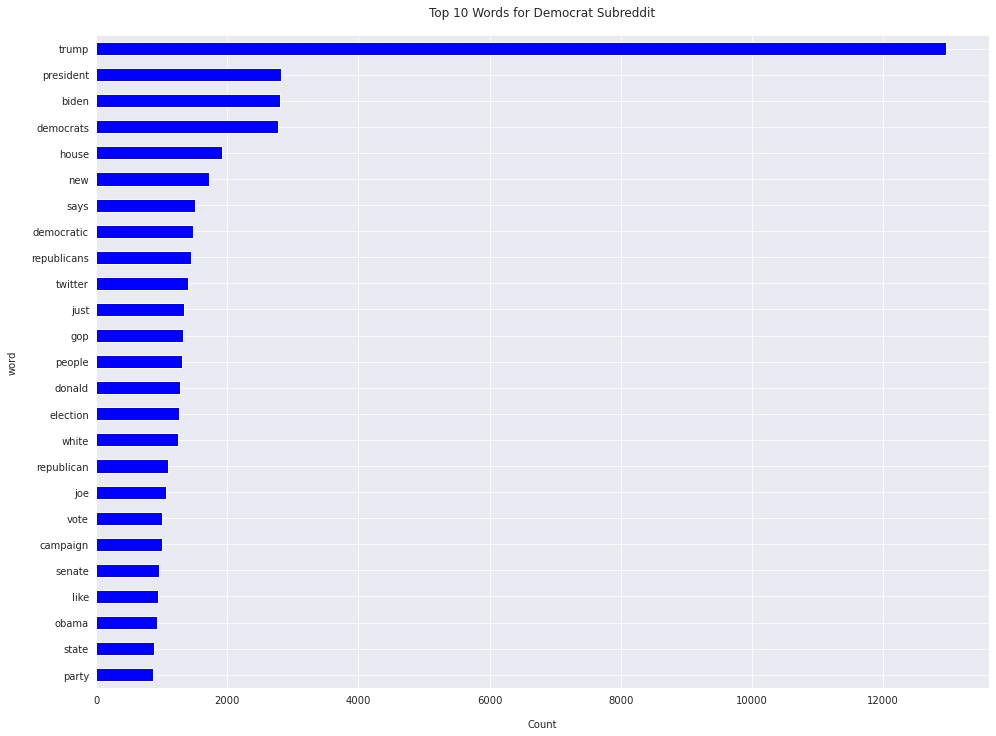

In [89]:
viz_bar(viz_d,"Top 10 Words for Democrat Subreddit",'blue')

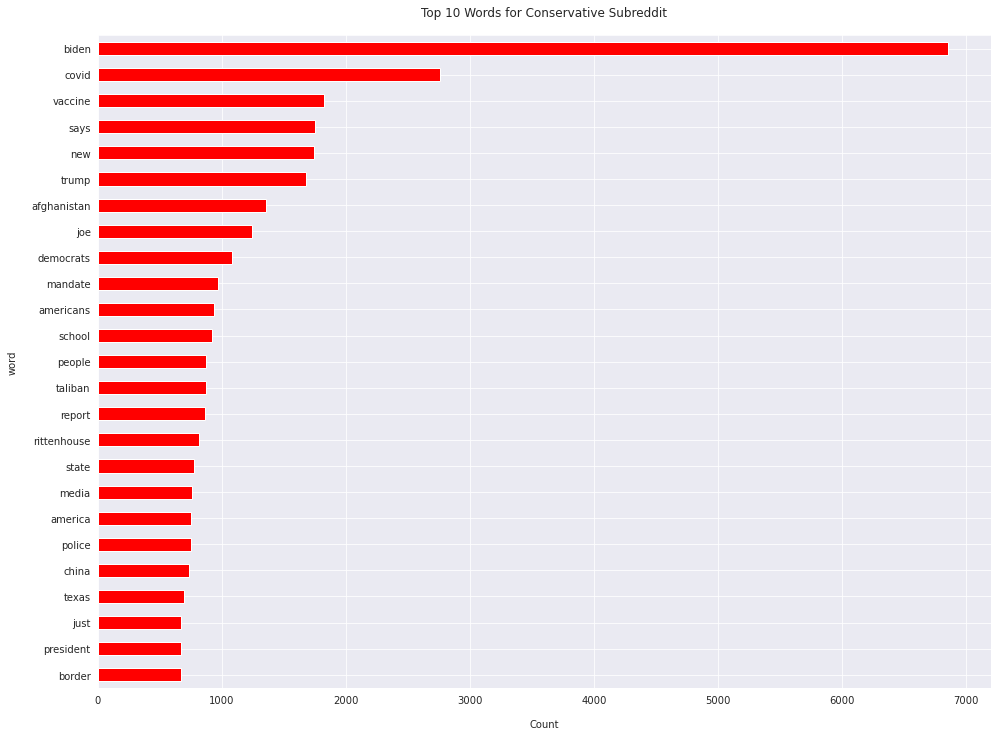

In [90]:
viz_bar(viz_r,"Top 10 Words for Conservative Subreddit", 'red')

Since both subreddits mention similar top words, bigrams will be explored to determine the context differences

In [91]:
df['time'] = pd.to_datetime(df['created_utc'], unit='s')
df['time'].head()
df['date_ymd'] = df['time'].dt.strftime('%Y-%m-%d')
df['date_ymd']

viz = pd.concat([X_df, df['sub_bin']], axis=1)

viz = pd.concat([viz, df['date_ymd']], axis=1)
viz['counter'] = 1

viz_d = viz[viz['sub_bin'] == 0]
viz_r = viz[viz['sub_bin'] == 1]
viz_r

,abortion,abuse,access,according,account,accused,act,action,actually,ad,...,years,yes,york,young,youngkin,youtube,zero,sub_bin,date_ymd,counter
37258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
37259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
37260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
37261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,2022-01-17,1
37262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-08-12,1
72916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-08-12,1
72917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-08-12,1
72918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-08-12,1


In [92]:
def lineplt(data, figtitle, xspacing):

    lineplot = data.groupby('date_ymd').count()

    plt.figure( figsize = ( 20, 8 ) )
    sns.set_style("darkgrid")
    sns.lineplot(x=lineplot.index, y=lineplot['counter'] )
    plt.title(figtitle)
    plt.ylabel('Number of Posts')
    plt.xlabel('Day')

    plt.xticks(ticks=lineplot.index[::xspacing],rotation=45)
    plt.tight_layout()
    plt.savefig('./output/' + figtitle + '.png')
    plt.show();

    return

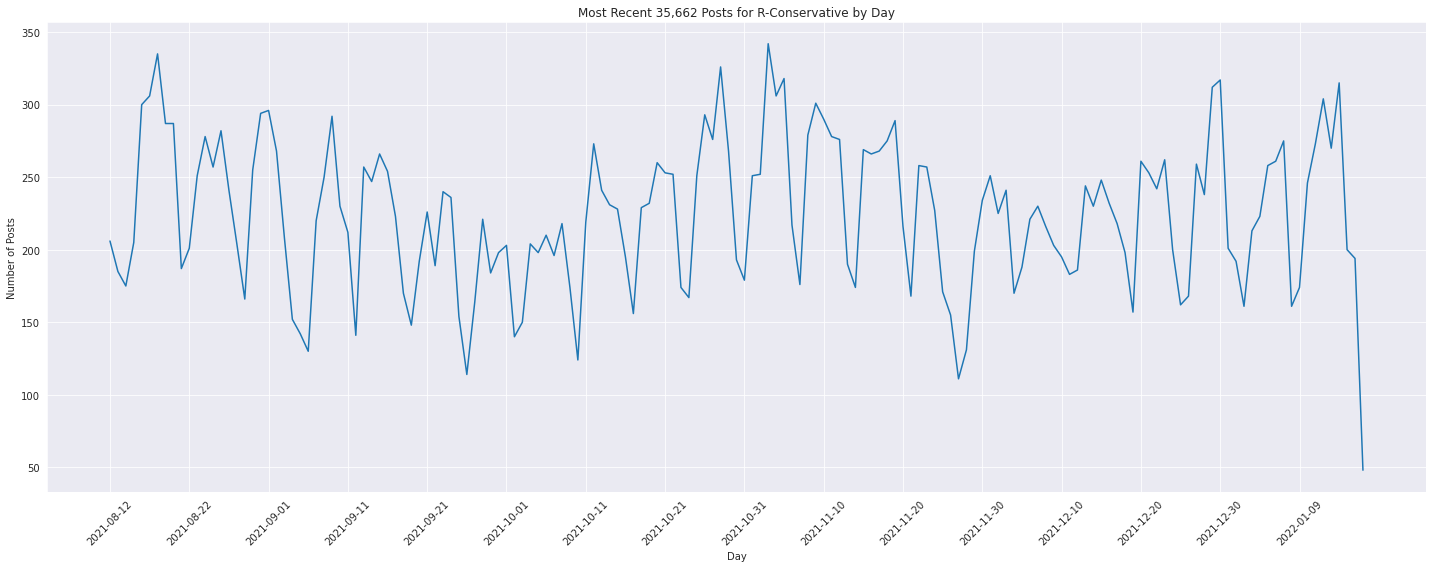

In [93]:
lineplt(viz_r, "Most Recent 35,662 Posts for R-Conservative by Day",10)

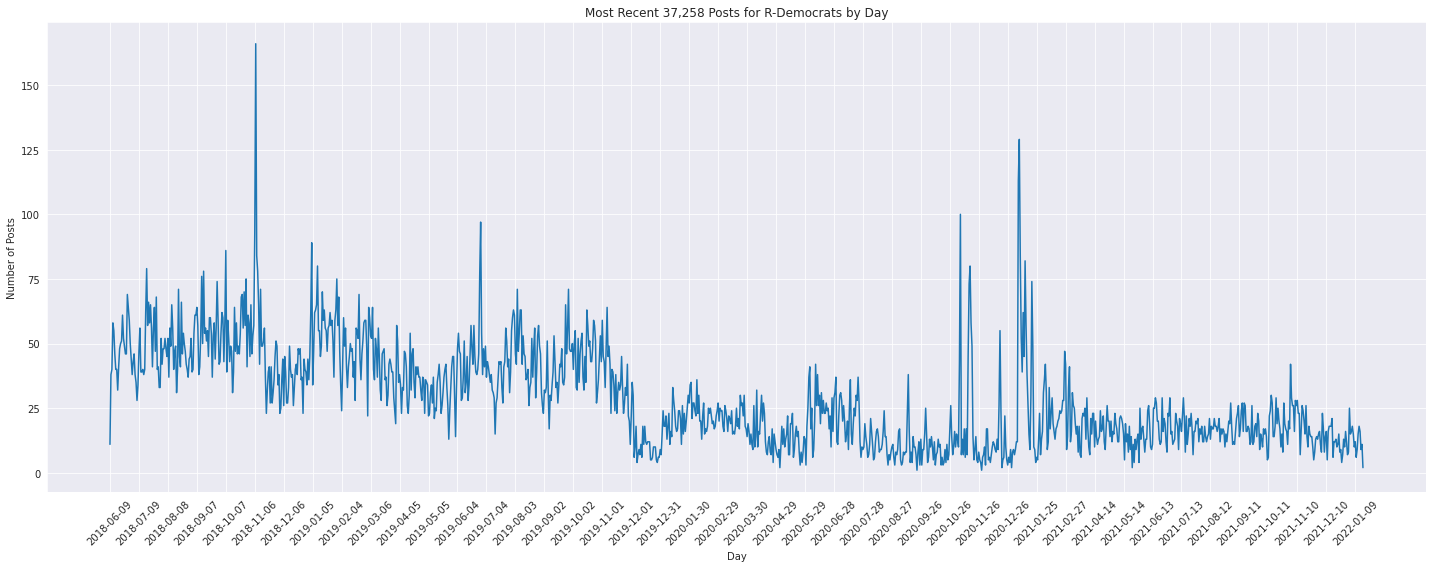

In [94]:
lineplt(viz_d, 'Most Recent 37,258 Posts for R-Democrats by Day',30)

In [95]:
len(viz_r)

35662

In [96]:
len(viz_d)

37258

___

# Modeling

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [99]:
X = df['title']
y = df['sub_bin']

In [100]:
y.value_counts(normalize= True)

0    0.510943
1    0.489057
Name: sub_bin, dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=74)

___

### First run, Count Vectorizor + Naiive Bayes

In [104]:
pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__max_features': [500, 1000, 2000, 3000 , 4000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

gs = GridSearchCV(pipe_cvec,
                  param_grid=pipe_params,
                  cv=5)

gs.fit(X_train, y_train)

0.8188334247577254


0.8188151398793198

In [126]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
print(gs.best_estimator_)

0.8311757176814775
0.8188151398793198
Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=2)),
                ('nb', MultinomialNB())])


### First run, TFID Vectorizor + Naiive Bayes

In [109]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features': [500, 1,000, 2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}


gs_tvec = GridSearchCV(pipe_tvec,
                       param_grid = pipe_tvec_params,
                       cv=5)

gs_tvec.fit(X_train, y_train)

In [127]:
print(gs_tvec.score(X_train, y_train))
print(gs_tvec.score(X_test, y_test))
print(gs_tvec.best_estimator_)

0.8383616748948619
0.8211190345584202
Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('nb', MultinomialNB())])


At least for the Bayes Model, it was preferring the highest value of max features for each pipeline gridsearch. Also 2 Ngrams seemed to be important for the TFID transformer, so the possible n grams will be expanded


___


### Second run, Count Vectorizor + Naiive Bayes

In [ ]:
pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__max_features': [4000, 7_000, 10_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.7,.8,.9],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

gs = GridSearchCV(pipe_cvec,
                  param_grid=pipe_params,
                  cv=5)

gs.fit(X_train, y_train)

In [ ]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
print(gs.best_estimator_)

### Second run, TFID Vectorizor + Naiive Bayes

In [131]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features': [5_000, 10_000, 15_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)]
}


gs_tvec = GridSearchCV(pipe_tvec,
                       param_grid = pipe_tvec_params,
                       cv=5)

gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [5000, 10000, 15000],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tvec__stop_words': [None, 'english']})

In [132]:
print(gs_tvec.score(X_train, y_train))
print(gs_tvec.score(X_test, y_test))
print(gs_tvec.best_estimator_)

0.86694093984275
0.8365331870543061
Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_features=15000, ngram_range=(1, 3),
                                 stop_words='english')),
                ('nb', MultinomialNB())])


---

### third run, Count Vectorizor + Naiive Bayes, first runs from above and including stop words that signifiy over emphasized topics

In [135]:
stop_list = ['trump','biden','joe','donald','president','democrats','democrat','republicans','republican']


stop_list = stop_list+list(CountVectorizer(stop_words = 'english').get_stop_words())

pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__max_features': [500, 1000, 2000, 3000, 4000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1, 1), (1, 2), (1,3)],
    'cvec__stop_words': ['english', stop_list]
}

gs = GridSearchCV(pipe_cvec,
                  param_grid=pipe_params,
                  cv=5)

gs.fit(X_train, y_train)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
print(gs.best_estimator_)

0.8361674894861949
0.8229840921557872
Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=2,
                                 stop_words='english')),
                ('nb', MultinomialNB())])


realized the max_df accounts for this, will re-run with lower max_df values


In [139]:

pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__max_df': [0.1, 0.2, .4, .6],
    'cvec__stop_words': ['english'],
    'cvec__max_features': [500, 2000, 4000],
    'cvec__min_df': [2]
}

gs = GridSearchCV(pipe_cvec,
                  param_grid=pipe_params,
                  cv=5)

gs.fit(X_train, y_train)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
print(gs.best_estimator_)

0.8361674894861949
0.8229840921557872
Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.2, max_features=4000, min_df=2,
                                 stop_words='english')),
                ('nb', MultinomialNB())])


---
### Lastly, a random forest model

In [142]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [145]:

pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params = {
 ,
    'cvec__stop_words': ['english'],

    'cvec__min_df': [2],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth':  [None, 1, 2, 3, 4, 5]
}

gs = GridSearchCV(pipe_cvec,
                  param_grid=pipe_params,
                  cv=5)

gs.fit(X_train, y_train)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
print(gs.best_estimator_)

0.9978606692265496
0.8324739440482721
Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.4, min_df=2, stop_words='english')),
                ('rf', RandomForestClassifier(n_estimators=200))])


SyntaxError: invalid syntax (2489780767.py, line 7)